In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
import matplotlib.pyplot as plt
from pyspark.sql.functions import avg
from sklearn.linear_model import LinearRegression
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression

In [2]:
# Membuat sesi Spark
spark = SparkSession.builder.appName("Visualisasi dengan PySpark").getOrCreate()

In [3]:
#Membaca dataset dan mengubahnya menjadi dataframe:
data = spark.read.csv("Rata-rata lama sekolah.csv", header=True, inferSchema=True)

In [4]:
data.printSchema()

root
 |-- Kota dan Kabupaten: string (nullable = true)
 |-- 2013: double (nullable = true)
 |-- 2014: double (nullable = true)
 |-- 2015: double (nullable = true)
 |-- 2016: double (nullable = true)
 |-- 2017: double (nullable = true)
 |-- 2018: double (nullable = true)
 |-- 2019: double (nullable = true)
 |-- 2020: double (nullable = true)
 |-- 2021: double (nullable = true)
 |-- 2022: double (nullable = true)
 |-- 2023: double (nullable = true)



In [50]:
data.show()

+--------------------+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-------------------+
|  Kota dan Kabupaten| 2013| 2014| 2015| 2016| 2017| 2018| 2019| 2020| 2021| 2022| 2023|Rata-rata 2013-2023|
+--------------------+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-------------------+
|         Kep. Seribu| 7.99| 8.03| 8.04| 8.24| 8.25| 8.46| 8.47| 8.68| 8.81| 9.02| 9.03|  8.456363636363635|
|Kota Jakarta Selatan|10.95|10.97|11.23|11.42|11.47|11.57|11.62|11.63|11.64|11.66|11.75| 11.446363636363637|
|  Kota Jakarta Timur|11.18|11.21|11.32|11.52| 11.6|11.64|11.65|11.66|11.67|11.73|11.88|  11.55090909090909|
|  Kota Jakarta Pusat|10.85|10.87|10.88|11.01|11.02|11.24|11.25|11.38|11.39|11.53|11.54| 11.178181818181816|
|  Kota Jakarta Barat|10.04|10.13|10.15|10.36|10.37|10.38| 10.4|10.63|10.78|11.13|11.23| 10.509090909090908|
|  Kota Jakarta Utara| 9.85| 9.85|10.05|10.23| 10.6|10.69| 10.7| 10.8|10.81|10.82|10.84| 10.476363636363637|
|               Bog

In [51]:
from pyspark.sql.functions import col

# Looping untuk menghitung jumlah nilai null dalam setiap kolom
null_counts = [data.where(col(c).isNull()).count() for c in data.columns]

# Menggabungkan nama kolom dengan jumlah null-nya
nulls_in_columns = zip(data.columns, null_counts)

# Menampilkan jumlah null dalam setiap kolom
for column, null_count in nulls_in_columns:
    print(f"Kolom '{column}' memiliki {null_count} nilai null")

Kolom 'Kota dan Kabupaten' memiliki 0 nilai null
Kolom '2013' memiliki 0 nilai null
Kolom '2014' memiliki 0 nilai null
Kolom '2015' memiliki 0 nilai null
Kolom '2016' memiliki 0 nilai null
Kolom '2017' memiliki 0 nilai null
Kolom '2018' memiliki 0 nilai null
Kolom '2019' memiliki 0 nilai null
Kolom '2020' memiliki 0 nilai null
Kolom '2021' memiliki 0 nilai null
Kolom '2022' memiliki 0 nilai null
Kolom '2023' memiliki 0 nilai null
Kolom 'Rata-rata 2013-2023' memiliki 0 nilai null


In [52]:
import pandas as pd
pandas_df = data.toPandas()

<AxesSubplot:>

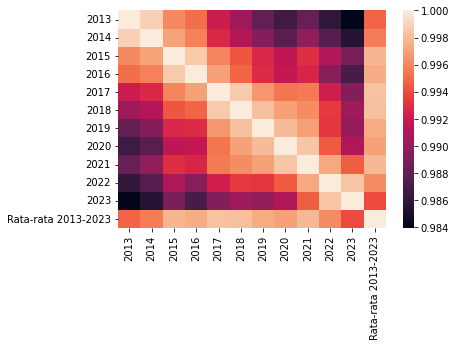

In [53]:
import seaborn as sns
sns.heatmap(data.toPandas().corr(numeric_only=True))

In [70]:
# Membaca nilai korelasi antara dua kolom pada DataFrame
nilai_korelasi = data.corr('2013', '2023')
print("Nilai korelasi antara 2013 dan 2023:", nilai_korelasi)

# Membaca nilai korelasi antara dua kolom pada DataFrame
nilai_korelasi = data.corr('2014', '2023')
print("Nilai korelasi antara 2014 dan 2023:", nilai_korelasi)

# Membaca nilai korelasi antara dua kolom pada DataFrame
nilai_korelasi = data.corr('2013', 'Rata-rata 2013-2023')
print("Nilai korelasi antara 2013 dan Rata-rata 2013-2023:", nilai_korelasi)

Nilai korelasi antara 2013 dan 2023: 0.9839466453843041
Nilai korelasi antara 2014 dan 2023: 0.9855532387517139
Nilai korelasi antara 2013 dan Rata-rata 2013-2023: 0.9947635628266395


<AxesSubplot:>

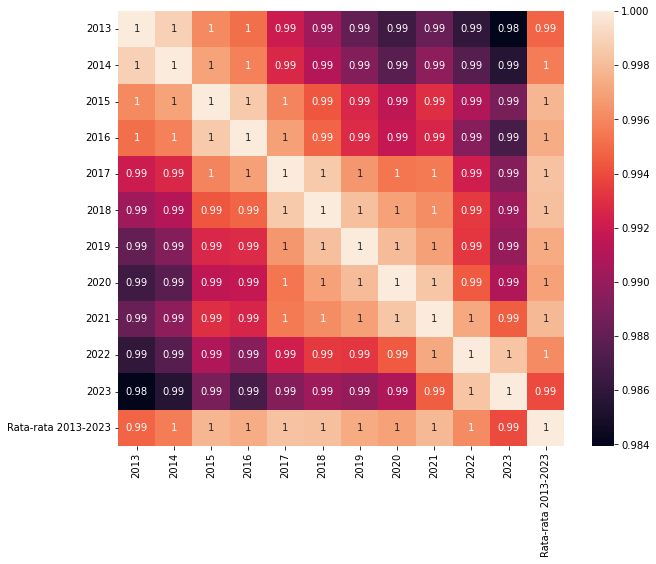

In [74]:
plt.figure(figsize=(10,8))
sns.heatmap(data.toPandas().corr(numeric_only=True), annot=True)

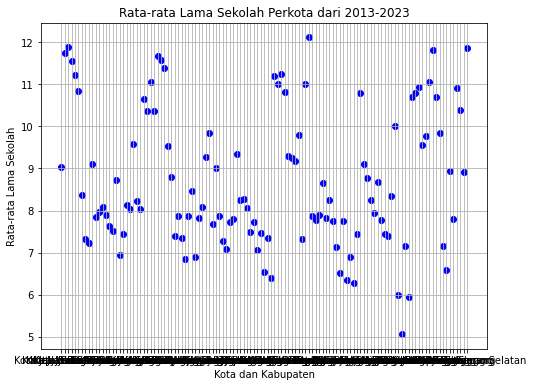

In [55]:
# Visualisasi data menggunakan Matplotlib
plt.figure(figsize=(8, 6))
plt.scatter(pandas_df["Kota dan Kabupaten"], pandas_df['2023'], marker='o', color='blue')
plt.title('Rata-rata Lama Sekolah Perkota dari 2013-2023')
plt.xlabel('Kota dan Kabupaten')
plt.ylabel('Rata-rata Lama Sekolah')
plt.grid(True)
plt.show()

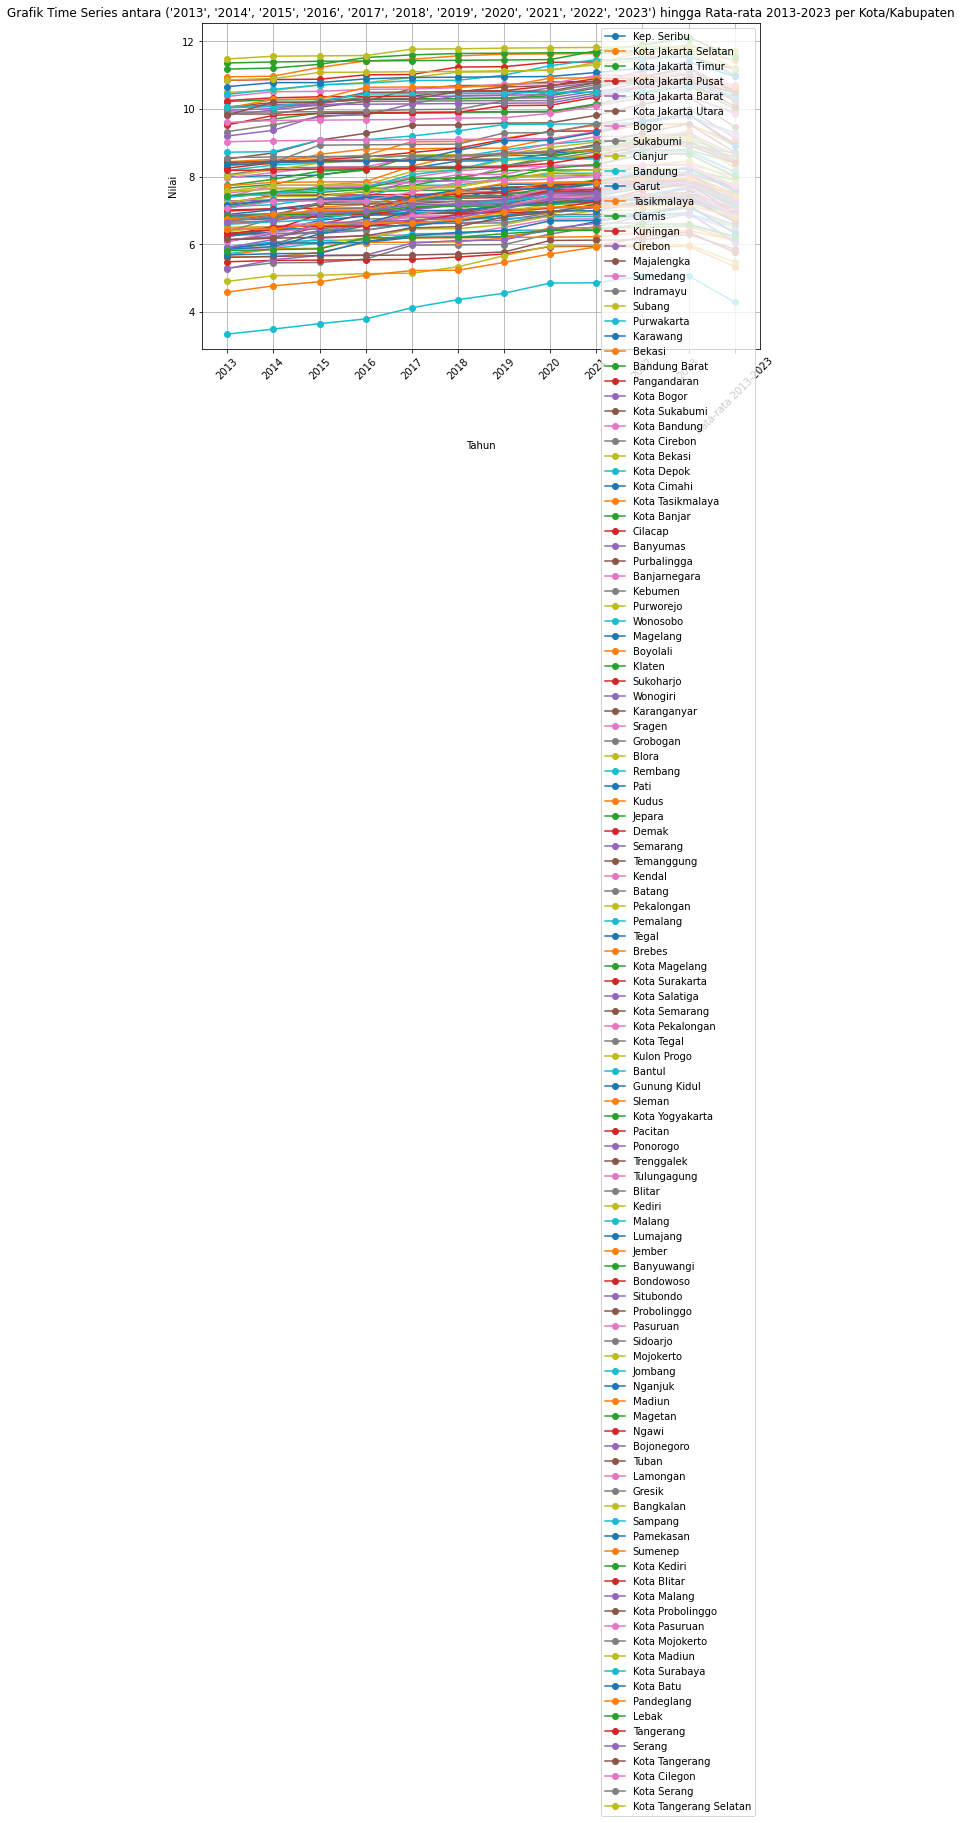

In [56]:
# Menentukan Variabel X dan Y
variable_x = '2013', '2014','2015','2016','2017','2018','2019','2020','2021','2022','2023'
variable_y = 'Rata-rata 2013-2023'

# Visualisasi grafik time series
plt.figure(figsize=(10, 6))
for index, row in pandas_df.iterrows():
    plt.plot(pandas_df.columns[1:], row.values[1:], marker='o', label=row[0])

plt.xlabel('Tahun')
plt.ylabel('Nilai')
plt.title(f'Grafik Time Series antara {variable_x} hingga {variable_y} per Kota/Kabupaten')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [12]:
# Menghitung rata-rata per baris dari kolom-kolom tahunan dan menambahkan kolom avg
data = data.withColumn("Rata-rata 2013-2023", sum(col(c) for c in data.columns[1:]) / len(data.columns[1:]))

# Menampilkan hasil
data.show()

+--------------------+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-------------------+
|  Kota dan Kabupaten| 2013| 2014| 2015| 2016| 2017| 2018| 2019| 2020| 2021| 2022| 2023|Rata-rata 2013-2023|
+--------------------+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-------------------+
|         Kep. Seribu| 7.99| 8.03| 8.04| 8.24| 8.25| 8.46| 8.47| 8.68| 8.81| 9.02| 9.03|  8.456363636363635|
|Kota Jakarta Selatan|10.95|10.97|11.23|11.42|11.47|11.57|11.62|11.63|11.64|11.66|11.75| 11.446363636363637|
|  Kota Jakarta Timur|11.18|11.21|11.32|11.52| 11.6|11.64|11.65|11.66|11.67|11.73|11.88|  11.55090909090909|
|  Kota Jakarta Pusat|10.85|10.87|10.88|11.01|11.02|11.24|11.25|11.38|11.39|11.53|11.54| 11.178181818181816|
|  Kota Jakarta Barat|10.04|10.13|10.15|10.36|10.37|10.38| 10.4|10.63|10.78|11.13|11.23| 10.509090909090908|
|  Kota Jakarta Utara| 9.85| 9.85|10.05|10.23| 10.6|10.69| 10.7| 10.8|10.81|10.82|10.84| 10.476363636363637|
|               Bog

In [57]:
#PEMILIHAN FITUR YANG DIINGINKAN

selected_data = data.select('Kota dan Kabupaten','2013', '2014','2015','2016','2017',
                            '2018','2019','2020','2021','2022','2023','Rata-rata 2013-2023')
selected_data.show()

+--------------------+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-------------------+
|  Kota dan Kabupaten| 2013| 2014| 2015| 2016| 2017| 2018| 2019| 2020| 2021| 2022| 2023|Rata-rata 2013-2023|
+--------------------+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-------------------+
|         Kep. Seribu| 7.99| 8.03| 8.04| 8.24| 8.25| 8.46| 8.47| 8.68| 8.81| 9.02| 9.03|  8.456363636363635|
|Kota Jakarta Selatan|10.95|10.97|11.23|11.42|11.47|11.57|11.62|11.63|11.64|11.66|11.75| 11.446363636363637|
|  Kota Jakarta Timur|11.18|11.21|11.32|11.52| 11.6|11.64|11.65|11.66|11.67|11.73|11.88|  11.55090909090909|
|  Kota Jakarta Pusat|10.85|10.87|10.88|11.01|11.02|11.24|11.25|11.38|11.39|11.53|11.54| 11.178181818181816|
|  Kota Jakarta Barat|10.04|10.13|10.15|10.36|10.37|10.38| 10.4|10.63|10.78|11.13|11.23| 10.509090909090908|
|  Kota Jakarta Utara| 9.85| 9.85|10.05|10.23| 10.6|10.69| 10.7| 10.8|10.81|10.82|10.84| 10.476363636363637|
|               Bog

In [58]:
#PEMISAHAN DATA TRAINING DAN DATA TESTING
# Memisahkan data menjadi data latih dan data uji dengan perbandingan 80:20
train_data, test_data = selected_data.randomSplit([0.8, 0.2], seed=42)
train_data.show()

+------------------+----+----+----+----+----+----+----+----+----+----+-----+-------------------+
|Kota dan Kabupaten|2013|2014|2015|2016|2017|2018|2019|2020|2021|2022| 2023|Rata-rata 2013-2023|
+------------------+----+----+----+----+----+----+----+----+----+----+-----+-------------------+
|           Bandung|8.18|8.34|8.41| 8.5|8.51|8.58|8.79|8.96|9.07|9.08|  9.1|  8.683636363636364|
|     Bandung Barat|7.39|7.51|7.53|7.63|7.74|7.97|8.18|8.19| 8.2|8.22| 8.23|               7.89|
|      Banjarnegara|5.86| 5.9|6.17|6.26|6.27|6.28| 6.5|6.74|6.75|6.84| 6.86|  6.402727272727272|
|            Bantul|8.72|8.74|9.08|9.09| 9.2|9.35|9.54|9.55|9.57|9.59| 9.79|  9.292727272727273|
|          Banyumas|7.18|7.31|7.31|7.39| 7.4|7.41|7.42|7.52|7.63|7.78| 7.87|  7.474545454545455|
|            Batang|5.88| 6.0|6.41|6.42|6.61|6.62|6.63|6.87|6.88| 6.9| 7.07|  6.571818181818181|
|            Blitar|6.67|6.82|7.24|7.25|7.26|7.27|7.29|7.39| 7.5|7.82| 7.83|  7.303636363636363|
|             Blora| 5.9|6.02|

In [59]:
test_data.show()

+------------------+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-------------------+
|Kota dan Kabupaten| 2013| 2014| 2015| 2016| 2017| 2018| 2019| 2020| 2021| 2022| 2023|Rata-rata 2013-2023|
+------------------+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-------------------+
|         Bangkalan|  4.9| 5.07| 5.08| 5.13| 5.14| 5.33| 5.66| 5.95| 5.96| 5.97| 5.99|  5.470909090909092|
|        Banyuwangi| 6.84| 6.87| 6.88| 6.93| 7.11| 7.12| 7.13| 7.16| 7.42| 7.66| 7.76|  7.170909090909092|
|            Bekasi| 8.34| 8.38| 8.66| 8.81| 8.82| 8.84| 8.84| 9.12|  9.3| 9.53| 9.57|   8.92818181818182|
|         Bondowoso| 5.48| 5.52| 5.53| 5.54| 5.55| 5.62| 5.71| 5.93| 5.94| 6.22| 6.36|  5.763636363636364|
|           Cirebon| 6.08| 6.31| 6.32| 6.41| 6.61| 6.62| 6.71| 6.92|  7.1|  7.4| 7.64|  6.738181818181818|
|          Grobogan| 6.25| 6.32| 6.33| 6.62| 6.66| 6.67| 6.86| 6.91| 7.11| 7.26| 7.28|  6.751818181818183|
|       Karanganyar| 8.38| 8.47| 8.48

In [60]:
# Pembuatan Model Regresi Linear
assembler = VectorAssembler(inputCols=['2013', '2014','2015','2016','2017','2018','2019',
                                       '2020','2021','2022','2023','Rata-rata 2013-2023'], 
                            outputCol='rata-rata lama sekolah')
train_data = assembler.transform(train_data)
test_data = assembler.transform(test_data)

In [62]:
# Inisialisasi model regresi linear
lr = LinearRegression(featuresCol='rata-rata lama sekolah', labelCol='Rata-rata 2013-2023')

In [63]:
# Melatih model menggunakan data latih
model = lr.fit(train_data)

In [64]:
# Melakukan prediksi menggunakan data uji
predictions = model.transform(test_data)

In [65]:
from pyspark.ml.evaluation import RegressionEvaluator

# Evaluasi model
evaluator_rmse = RegressionEvaluator(labelCol='Rata-rata 2013-2023', predictionCol='prediction', metricName='rmse')
evaluator_mae = RegressionEvaluator(labelCol='Rata-rata 2013-2023', predictionCol='prediction', metricName='mae')
evaluator_r2 = RegressionEvaluator(labelCol='Rata-rata 2013-2023', predictionCol='prediction', metricName='r2')

# Menghitung nilai untuk model
rmse = evaluator_rmse.evaluate(predictions)
mae = evaluator_mae.evaluate(predictions)
r2 = evaluator_r2.evaluate(predictions)

# Tampilkan hasil evaluasi
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')

Root Mean Squared Error (RMSE): 3.8783582457018895e-13
Mean Absolute Error (MAE): 3.0254586714694265e-13
R-squared (R2): 1.0


In [69]:
# Tampilkan hasil prediksi
predictions.select('Kota dan Kabupaten', '2013', '2014', '2015', '2016', '2017',
                   '2018', '2019', '2020', '2021', '2022', '2023','Rata-rata 2013-2023','prediction').show()

+------------------+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-------------------+------------------+
|Kota dan Kabupaten| 2013| 2014| 2015| 2016| 2017| 2018| 2019| 2020| 2021| 2022| 2023|Rata-rata 2013-2023|        prediction|
+------------------+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-------------------+------------------+
|         Bangkalan|  4.9| 5.07| 5.08| 5.13| 5.14| 5.33| 5.66| 5.95| 5.96| 5.97| 5.99|  5.470909090909092| 5.470909090908851|
|        Banyuwangi| 6.84| 6.87| 6.88| 6.93| 7.11| 7.12| 7.13| 7.16| 7.42| 7.66| 7.76|  7.170909090909092|7.1709090909097295|
|            Bekasi| 8.34| 8.38| 8.66| 8.81| 8.82| 8.84| 8.84| 9.12|  9.3| 9.53| 9.57|   8.92818181818182| 8.928181818181645|
|         Bondowoso| 5.48| 5.52| 5.53| 5.54| 5.55| 5.62| 5.71| 5.93| 5.94| 6.22| 6.36|  5.763636363636364| 5.763636363636204|
|           Cirebon| 6.08| 6.31| 6.32| 6.41| 6.61| 6.62| 6.71| 6.92|  7.1|  7.4| 7.64|  6.738181818181818| 6.738181818

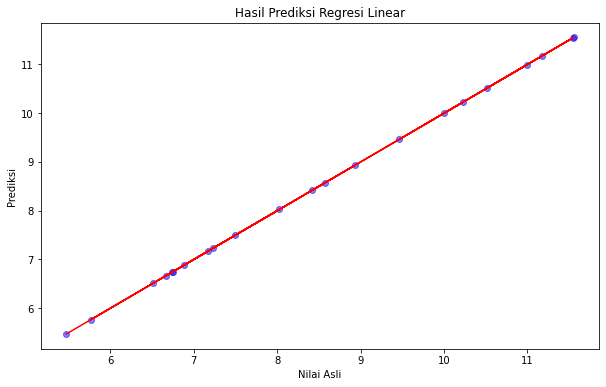

In [68]:
# Mengonversi data prediksi menjadi Pandas DataFrame
pred_df = predictions.select('Rata-rata 2013-2023', "prediction").toPandas()

# Visualisasi hasil prediksi
plt.figure(figsize=(10, 6))
plt.scatter(pred_df['Rata-rata 2013-2023'], pred_df['prediction'], color='blue', alpha=0.5)
plt.plot(pred_df['Rata-rata 2013-2023'], pred_df['Rata-rata 2013-2023'],
         label="Ideal", color="red")  # Garis ideal (nilai aktual = prediksi)
plt.xlabel('Nilai Asli')
plt.ylabel('Prediksi')
plt.title('Hasil Prediksi Regresi Linear')
plt.show()